# THE SPARK FOUNDATION

## TASK 1 : Prediction using Supervised ML

### Author: Ravulakollu Narender

<b> IMPORTING THE LIBRARIES </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b> CALCULATING ALL THE CONSTRAINTS </b>

In [3]:
dataset.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b> DISPLAYING ALL THE COLUMNS AND THEIR DATA TYPES </b>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b> CHECKING IF THERE EXISTS ANY NULL VALUE </b>

In [5]:
dataset.isnull == True

False

<b> AS THE DATASET HAS NO NULL VALUES, NOW WE CAN VISUALIZE THE DATA </b>

Text(0.5, 0, 'Study Hours')

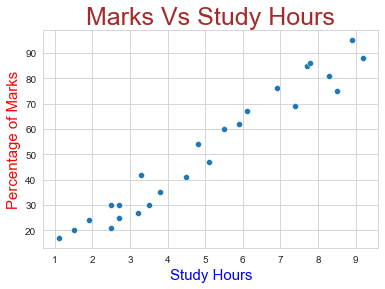

In [6]:
sns.set_style('whitegrid')
sns.scatterplot(y= dataset['Scores'], x= dataset['Hours'])
plt.title('Marks Vs Study Hours', size=25,color="brown")
plt.ylabel('Percentage of Marks', size=15,color="red")
plt.xlabel('Study Hours', size=15,color="blue")

<b> HERE, WE CAN SEE THAT THERE IS A CORRELATION BETWEEN "PERCENTAGE OF MARKS" AND "STUDY HOURS"

TO VERIFY THE SAME, LETS PLOT A REGRESSION LINE TO THE ABOVE GRAPH </b>

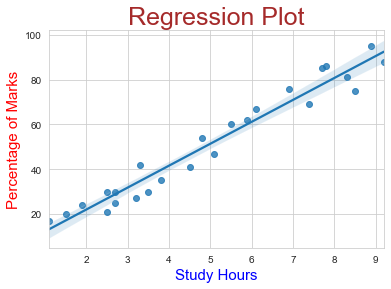

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= dataset['Hours'], y= dataset['Scores'])
plt.title('Regression Plot', size=25,color="brown")
plt.ylabel('Percentage of Marks', size=15,color="red")
plt.xlabel('Study Hours', size=15,color="blue")
plt.show()
print(dataset.corr())

<B> FROM THE ABOVE GRAPH WE HAVE VERIFIED THAT THE VARIABLES ARE POSITIVELY CORRELATED </B>

## MODEL TRAINING

<b> FIRSTLY, WE WILL DEFINE VARIABLES A & B FROM THE DATASET AND THEN SPLIT THE DATASET INTO TWO PARTS. </b>

In [8]:
# Define variables A and B from the Dataset
A = dataset.iloc[:, :-1].values
B = dataset.iloc[:, 1].values

# Split the Dataset into two parts
train_A, val_A, train_B, val_B = train_test_split(A, B, random_state = 0)

<b> SECONDLY, WE WILL BE DOING DATA FITTING IN THE MODEL </b>

In [9]:
var_regression = LinearRegression()
var_regression.fit(train_A, train_B)
print("MODEL IS TRAINED SUCCESSFULLY!")

MODEL IS TRAINED SUCCESSFULLY!


<b> NOW WE WILL MOVE ON TO PREDICTION OF THE PERCENTAGE OF THE MARKS. </b>

In [10]:
var_prediction_B = var_regression.predict(val_A)
Prediction = pd.DataFrame({'Study Hours': [i[0] for i in val_A], 'Predicted Marks': [j for j in var_prediction_B]})
Prediction

,Study Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


<b> NOW, COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS IN THE DATASET. </b>

In [11]:
comparison_of_scores = pd.DataFrame({'Actual Marks': val_B, 'Predicted Marks': var_prediction_B})
comparison_of_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<b> HERE, WE COMPARE THE PREDICTED MARKS WITH THE ACTUAL MARKS USING THE DATA VISUALIZATION </b>

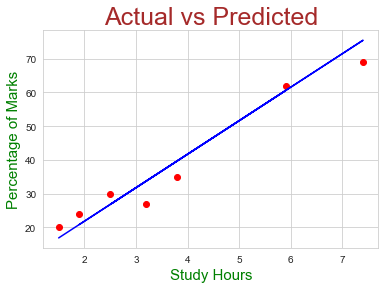

In [12]:
plt.scatter(x=val_A, y=val_B, color='Red')
plt.plot(val_A, var_prediction_B, color='Blue')
plt.title('Actual vs Predicted', size=25,color="Brown")
plt.ylabel('Percentage of Marks', size=15,color="Green")
plt.xlabel('Study Hours', size=15,color="Green")
plt.show()

### MODEL EVALUATION

<b> LET'S CALCULATE THE ACCURACY OF THE MODEL </b>

In [13]:
print('Mean absolute error: ',mean_absolute_error(val_B,var_prediction_B))

Mean absolute error:  4.130879918502482


<b> As the value of the Mean Absolute Error is very small, it indicates that there are very less possibilities of errors throughout the model.</b>

<b> NOW MOVING ON TOWARDS OUR QUESTION, LET'S FIND THE ANSWER </b>

## WHAT WILL BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS PER DAY?

In [14]:
hours = [9.25]
answer_to_the_question = var_regression.predict([hours])
print("Score : {}".format(round(answer_to_the_question[0],4)))

Score : 93.8927


## According to regression model, if a student studies for 9.25 hours per day then the student is likely to score 93.8927 marks.